# 1. Introduction to Data Analysis with Python

In this notebook, we will step into the coding world. We created a dataset including 50 people's information (Age, Height, Weight).

We will use 3 main libraries:
* **Pandas:** To read and manage the data.
* **NumPy:** To make mathematical calculations (like BMI).
* **Matplotlib / Seaborn:** To visualize the data.

<b> IMPORTANT: </b> 

If you have never worked with python or jupyter notebook in your own computer please download them before running the project. Otherwise, probably you will get an error. 
Search for: How to downlaod python and Jupyter Notebook .



If you have never worked with these libraries you should download these on your computer with command line. This process is different in MacOS and Windows so you should learn it yourself. 
Search for : How to pip pandas/numpy/matplotlib for Windows/MacOS for example.

In [1]:
# Before running the main script, this code creates a sample CSV file named 'my_data.csv' with random data.
import pandas as pd
import numpy as np


np.random.seed(42) 

data = {
    'Age': np.random.randint(18, 65, 50), 
    'Height': np.random.normal(1.70, 0.10, 50).round(2), 
    'Weight': np.random.normal(70, 15, 50).round(1), 
    'Gender': np.random.choice(['Female', 'Male'], 50) 
}


df_create = pd.DataFrame(data)
df_create.to_csv('my_data.csv', index=False)

print("'my_data.csv' is ready to use.")

'my_data.csv' is ready to use.


Let's start by importing our libraries and loading the data!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('my_data.csv')

# Show the first 5 rows
df.head()

,Age,Height,Weight,Gender
0,56,1.78,60.8,Female
1,46,1.59,75.0,Female
2,32,1.81,49.3,Male
3,60,1.74,65.8,Male
4,25,1.66,69.1,Female


By looking at the data, it is easy to get the idea. There are relations between age, height, weight and gender. In the real world, we know what BMI is. But this is a random data so there could be some contradictions. 

We will just analyze our data by using our libraries. Not train a model to predict the gender by given values.

### 2. Understanding the Data (Pandas)

Before doing anything, we must understand our data structure.
* `df.info()`: Shows us if there are any missing values and data types.
* `df.describe()`: Gives us the summary statistics (Mean, min, max values).

In [3]:

print("--- Data Info ---")
df.info()

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     50 non-null     int64  
 1   Height  50 non-null     float64
 2   Weight  50 non-null     float64
 3   Gender  50 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB


By looking at the first table we can easily see that 4 columns, how many cell is non-null for each column and data types of the columns.

We have talked about <b> dirty data </b> in the previous chapter. There is not a null value because we fill the values randomly but most of the real values are dirty value. I choose this way because our first aim is learning the basics.

Data types are about the programming basics. For example:<b> int64</b> means that all of the values in age column are integer numbers like e10, 18, 62 etc.<b> float64 </b>means floating numbers 18.6, 45.9, 52,7 etc. <b> object</b> means everything except numerical values like category, text etc.

In [4]:
print("\n--- Statistical Summary ---")
df.describe()


--- Statistical Summary ---


,Age,Height,Weight
count,50.000000,50.000000,50.000000
mean,40.140000,1.708200,67.376000
std,13.278815,0.097639,12.941494
min,19.000000,1.500000,38.600000
25%,29.500000,1.635000,57.250000
50%,39.500000,1.715000,68.050000
75%,52.250000,1.777500,75.350000
max,64.000000,1.970000,99.200000


In this table there are some statistical values. Let's explain them:

### Understanding Statistical Terms (df.describe)

When we use `df.describe()`, we get a summary table. Here is what the terms mean:

* **count :** How many entries do we have? (Non-missing values).
    * *Example:* If it says 50, we have data for 50 people.
* **mean :** The average value. (Sum of all values / Count).
    * *Example:* If average height is 1.70, the group is generally this tall.
* **std (Standard Deviation):** How spread out are the numbers?
    * *Low std:* Everyone is close to the average (Everyone is around 1.70m).
    * *High std:* People are very different (Some are 1.50m, some are 2.10m).
* **min:** The smallest value in the column.
* **25% (Q1 - First Quartile):** The "Lower" part of the group. 25% of people are below this value.
* **50% (Median):** The **middle** person. If we line up everyone from shortest to tallest, this is the person exactly in the middle.
    * *Note:* Median is often more reliable than Mean because it is not affected by extreme outliers (like one giant person).
* **75% (Q3 - Third Quartile):** The "Upper" part of the group. 75% of people are below this value.
* **max:** The largest value in the column.


### Feature Engineering

Our data has 4 columns but there are some relations between columns. We can give the relations a name and add them to the our data frame to use later. 

We have Height and Weight, but we don't have **BMI (Body Mass Index)**.
We can create a new feature using mathematical operations.

The formula is: $$BMI = \frac{Weight}{Height^2}$$

In [5]:

df['BMI'] = df['Weight'] / (df['Height'] ** 2)

df['BMI'] = np.round(df['BMI'], 2)

df.head()

,Age,Height,Weight,Gender,BMI
0,56,1.78,60.8,Female,19.19
1,46,1.59,75.0,Female,29.67
2,32,1.81,49.3,Male,15.05
3,60,1.74,65.8,Male,21.73
4,25,1.66,69.1,Female,25.08


### 4. Filtering the Data

Sometimes we only need specific parts of the data.
For example: Let's find people who are **older than 30** and have a **BMI greater than 25** (Overweight threshold).

In [6]:
filtered_data = df[(df['Age'] > 30) & (df['BMI'] > 25)]

print(f"Number of people matching : {len(filtered_data)}")
filtered_data.head()

Number of people matching : 15


,Age,Height,Weight,Gender,BMI
1,46,1.59,75.0,Female,29.67
5,38,1.58,84.4,Male,33.81
6,56,1.76,96.9,Male,31.28
7,36,1.63,78.7,Male,29.62
8,40,1.56,74.5,Male,30.61


### Data Visualization
Charts and graphs are simplier to understand so we visualize the data in the most of the data analysis projects.

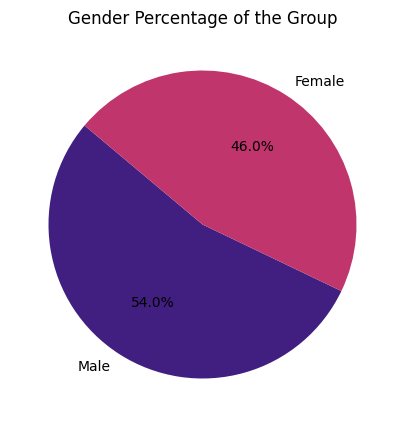

In [7]:

gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=["#411f80","#c1356d"])
plt.title('Gender Percentage of the Group')
plt.show()

By looking at the Pie Chart we can see distrubution of genders in our data. If we make our data larger, parts are more tend to be %50.

### Let's move on other Graphs

####  Line Chart (Time Series Analysis)
Line charts are perfect for showing **changes over time** (e.g., Stock prices, Temperature changes, Website visits).

*Let's create some fake data representing the price of "Bitcoin" over 30 days.*

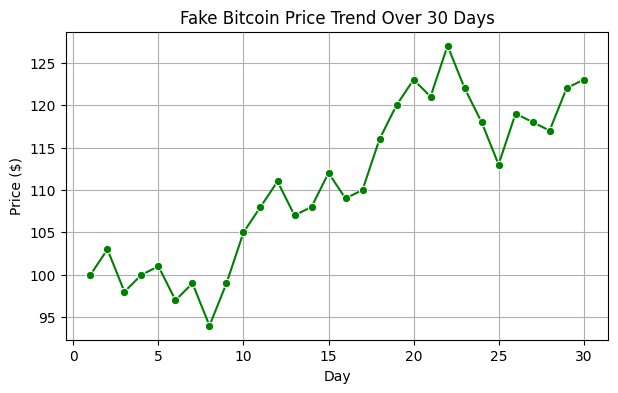

In [8]:
days = np.arange(1, 31) 

prices = [100]
for i in range(29):
    change = np.random.randint(-5, 8) 
    prices.append(prices[-1] + change)


plt.figure(figsize=(7, 4))
sns.lineplot(x=days, y=prices, marker='o', color='green')
plt.title('Fake Bitcoin Price Trend Over 30 Days')
plt.xlabel('Day')
plt.ylabel('Price ($)')
plt.grid(True) 
plt.show()

#### Bar Chart (Categorical Comparison)
Bar charts are the best way to compare quantities of different categories.

*Let's create fake data for a Fruit Shop's daily sales.*

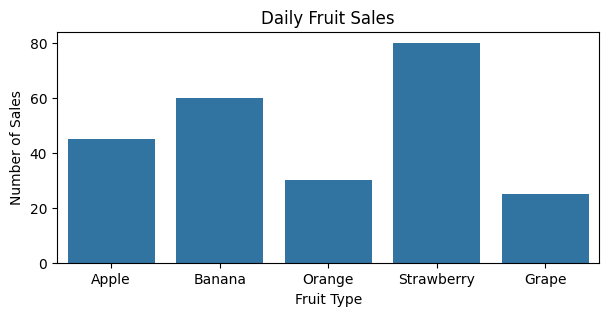

In [9]:

products = ['Apple', 'Banana', 'Orange', 'Strawberry', 'Grape']
sales = [45, 60, 30, 80, 25]

plt.figure(figsize=(7, 3))
sns.barplot(x=products, y=sales)
plt.title('Daily Fruit Sales')
plt.xlabel('Fruit Type')
plt.ylabel('Number of Sales')
plt.show()

#### Heatmap (Correlation Matrix)
This is a **Pro-Data Scientist Tool**. It shows how much variables are related to each other.
* **1.0:** Perfect positive relationship (One goes up, other goes up).
* **-1.0:** Perfect negative relationship (One goes up, other goes down).
* **0:** No relationship.

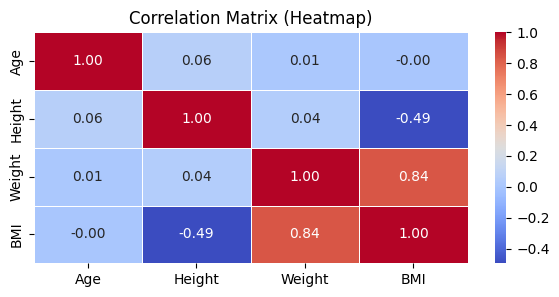

In [10]:
# Calculating Correlation (Only for numeric columns)
corr_matrix = df[['Age', 'Height', 'Weight', 'BMI']].corr()

plt.figure(figsize=(7, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Heatmap)')
plt.show()

#### Box Plot (Outlier Detection)
Remember "Standard Deviation"? Box Plot shows us the **Spread** and **Outliers** (Extreme values).
The dots outside the box are usually considered anomalies.

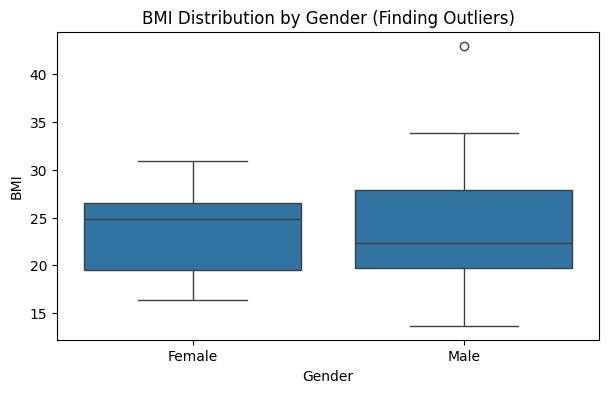

In [11]:
new_person = {
    'Age': 28,
    'Height': 1.60,
    'Weight': 110.0,
    'Gender': 'Male'
}

new_row_df = pd.DataFrame([new_person])
df = pd.concat([df, new_row_df], ignore_index=True)

df['BMI'] = df['Weight'] / (df['Height'] ** 2)
df['BMI'] = np.round(df['BMI'], 2)


plt.figure(figsize=(7, 4))

sns.boxplot(x='Gender', y='BMI', data=df)
plt.title('BMI Distribution by Gender (Finding Outliers)')
plt.show()